In [3]:
!pip install transformers
!pip install langchain
!pip install langchain-huggingface

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: packaging
    Found existing installation: packaging 25.0
    Uninstalling packaging-25.0:
      Successfully uninstalled packaging-25.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.6.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.3.2 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
bigframes 1.42.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
pandas-gbq 0.28.0 requires google-api-core<3.0.0dev,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
mlxtend 0.23.4 requires scikit-learn>=1.3.1, but you have scikit-le

In [4]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain_huggingface import HuggingFacePipeline
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

hf_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    do_sample=True,
    temperature=0.7,
    max_new_tokens=512,
)

llm = HuggingFacePipeline(pipeline=hf_pipeline)

prompt = PromptTemplate(
    template='Generate 5 interesting facts about {topic}',
    input_variables=['topic']
)

parser = StrOutputParser()

chain = prompt | llm | parser

result = chain.invoke({'topic':'cricket'})

print(result)

chain.get_graph().print_ascii()

Device set to use cpu


Generate 5 interesting facts about cricket for kids. 1. Cricket is the World's most popular sport. 2. Cricket is played with a ball and a bat. 3. Cricket is played by 200 million people worldwide. 4. Cricket is played in 110 countries. 5. Cricket is played in 23 countries that have a population of over 1 billion people. 6. The World Cup is the largest international cricket tournament. 7. The first cricket match was played in 1744 between England and Scotland. 8. The first cricket match was played between the Rye Cricket Club and the Surbiton Cricket Club in 1744. 9. England is the only team to win the World Cup three times. 10. The longest cricket match in history lasted for 6 days. 11. Australia is the only team to win the World Cup without losing a single match. 12. The most number of ODIs played in a single day is 151 in 2010. 13. The highest number of runs scored in a single innings is 3,326 by Allan Border in 1987. 14. The highest score in a single match is 458 by Andrew Flintoff 

In [4]:
!pip install grandalf


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 857.6 kB/s eta 0:00:00:01


In [10]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
from langchain_huggingface import HuggingFacePipeline
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda

model_id = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(model_id)

hf_pipeline = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    do_sample=True,
    temperature=1.5,
    max_new_tokens=512,
)
llm = HuggingFacePipeline(pipeline=hf_pipeline)

prompt1 = PromptTemplate(
    template='Generate a detailed report on {topic}',
    input_variables=['topic']
)

prompt2 = PromptTemplate(
    template='Generate a 5 pointer summary from the following text:\n{text}',
    input_variables=['text']
)


parser = StrOutputParser()

wrap_text_as_dict = RunnableLambda(lambda x: {'text': x})

chain = prompt1 | llm | parser | wrap_text_as_dict | prompt2 | llm | parser

result = chain.invoke({'topic': 'Unemployment in India'})

print("Final 5-point Summary:\n", result)

chain.get_graph().print_ascii()


Device set to use cpu


Final 5-point Summary:
 Generate a 5 pointer summary from the following text:
Generate a detailed report on Unemployment in India from 2016 to 2020, analyzing key indicators such as unemployment rate, gender distribution, geographic presence, economic and financial statistics, policy impacts, etc. Use both primary and secondary sources and be objective in your analysis. Develop a visually appealing chart and graph that clearly communicate the report's findings and interpretations. Make your report comprehensive, informative, and engaging for a lay audience and recommend government and business actions to accelerate employment rates despite pandemic conditions. Use data from reliable international sources, such as World Bank and Reserve Bank of India, if possible.
     +-------------+       
     | PromptInput |       
     +-------------+       
            *              
            *              
            *              
    +----------------+     
    | PromptTemplate |     
  

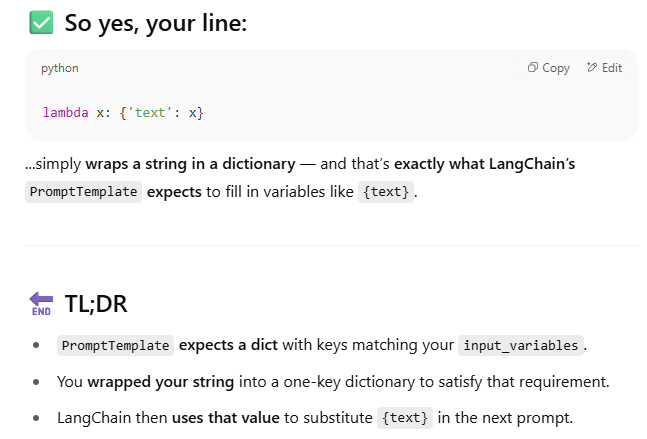